In [1]:
import pandas as pd
import nltk  # Natural Language Toolkit : 자연어 처리 패키지

In [2]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [6]:
all_data = pd.read_csv('riss_bigdata.csv')
all_title = all_data['제목']
all_data

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Big Data in Healthcare: Opportunities and Chal...,unknown,Mary Ann Leibert,2015
1,NaN,2,Combining Human Computing and Machine Learning...,unknown,Mary Ann Leibert,2016
2,NaN,3,Big data (lost) in the cloud,"Di Martino, Beniamino; Aversa, Rocco; Cretella...",Inderscience,2014
3,NaN,4,Big Earth data: A new frontier in Earth and in...,"Guo, Huadong",John Wiley & Sons Ltd,2017
4,NaN,5,Common Big Data Challenges and How to Overcome...,unknown,Mary Ann Leibert,2014
...,...,...,...,...,...,...
95,NaN,6,Big-BOE: Fusing Spanish Official Gazette with ...,"Basanta-Val, P.; Sánchez-Fernández, L.",Mary Ann Leibert,2018
96,NaN,7,Resting-State fMRI Functional Connectivity: Bi...,"Phinyomark, A.; Ibanez-Marcelo, E.; Petri, G.",unknown,2017
97,NaN,8,A reference architecture for big data solution...,"Geerdink, Bas",Inderscience,2015
98,NaN,9,Thermal-Aware and DVFS-Enabled Big Data Task S...,"Liu, H.; Liu, B.; Yang, L. T.; Lin, M.; Deng, ...",unknown,2018


In [25]:
from nltk.corpus import stopwords  # 불용어가 들어가 있는 라이브러리
from nltk.stem import WordNetLemmatizer  # 표제어를 추출해줌(명사추출)
from nltk.tokenize import word_tokenize
import re

stopWords = set(stopwords.words('english')) # NLTK가 정의 한 영어 불용어(의미없는 용어) 리스트
lemma = WordNetLemmatizer()  # 표제어 추출 객체

words=[]

for title in all_title:
#     print(title)
    enWords = re.sub(r'[^a-zA-Z]',' ',str(title)) # 영어가 아닌 것 ' ' 대체  / ^ : not의 의미
    enWordsToken = word_tokenize(enWords.lower())  # 소문자로 만들어서 토큰으로 나눠서 리스트로 저장
#     print(enWordsToken)
    enWordsTokenStop = [w for w in enWordsToken if w not in stopWords]  # enWordsToken에서 불용어가 아닌 것만 리스트에 담음.
#     print(enWordsTokenStop)
    enWordsTokenStopLemma = [lemma.lemmatize(w) for w in enWordsTokenStop]
#     print(enWordsTokenStopLemma)
    words.append(enWordsTokenStopLemma)
words  # 결과 값이 2차원으로 나옴.
    

[['big', 'data', 'healthcare', 'opportunity', 'challenge'],
 ['combining',
  'human',
  'computing',
  'machine',
  'learning',
  'make',
  'sense',
  'big',
  'aerial',
  'data',
  'disaster',
  'response'],
 ['big', 'data', 'lost', 'cloud'],
 ['big',
  'earth',
  'data',
  'new',
  'frontier',
  'earth',
  'information',
  'science'],
 ['common', 'big', 'data', 'challenge', 'overcome'],
 ['stgi',
  'spatio',
  'temporal',
  'grid',
  'index',
  'model',
  'marine',
  'big',
  'data'],
 ['tv', 'audience', 'measurement', 'big', 'data'],
 ['u',
  'army',
  'person',
  'event',
  'data',
  'environment',
  'military',
  'civilian',
  'big',
  'data',
  'enterprise'],
 ['medical',
  'school',
  'training',
  'relate',
  'practice',
  'evidence',
  'big',
  'data'],
 ['exercise',
  'exploring',
  'big',
  'data',
  'producing',
  'reliable',
  'statistical',
  'information'],
 ['gsio',
  'programmatic',
  'interface',
  'delivering',
  'big',
  'earth',
  'data',
  'service'],
 ['semantics

In [17]:
# 전처리가 끝난 words를 1차원 List
from functools import reduce
words2 = list(reduce(lambda x, y:x+y, words))
words2

['big',
 'data',
 'healthcare',
 'opportunity',
 'challenge',
 'combining',
 'human',
 'computing',
 'machine',
 'learning',
 'make',
 'sense',
 'big',
 'aerial',
 'data',
 'disaster',
 'response',
 'big',
 'data',
 'lost',
 'cloud',
 'big',
 'earth',
 'data',
 'new',
 'frontier',
 'earth',
 'information',
 'science',
 'common',
 'big',
 'data',
 'challenge',
 'overcome',
 'stgi',
 'spatio',
 'temporal',
 'grid',
 'index',
 'model',
 'marine',
 'big',
 'data',
 'tv',
 'audience',
 'measurement',
 'big',
 'data',
 'u',
 'army',
 'person',
 'event',
 'data',
 'environment',
 'military',
 'civilian',
 'big',
 'data',
 'enterprise',
 'medical',
 'school',
 'training',
 'relate',
 'practice',
 'evidence',
 'big',
 'data',
 'exercise',
 'exploring',
 'big',
 'data',
 'producing',
 'reliable',
 'statistical',
 'information',
 'gsio',
 'programmatic',
 'interface',
 'delivering',
 'big',
 'earth',
 'data',
 'service',
 'semantics',
 'way',
 'semantic',
 'web',
 'open',
 'science',
 'big',
 'ea

In [27]:
# 단어 빈도 구하기
from collections import Counter
count = Counter(words2)
count

Counter({'big': 104,
         'data': 116,
         'healthcare': 2,
         'opportunity': 2,
         'challenge': 6,
         'combining': 1,
         'human': 4,
         'computing': 2,
         'machine': 3,
         'learning': 3,
         'make': 1,
         'sense': 1,
         'aerial': 1,
         'disaster': 1,
         'response': 2,
         'lost': 2,
         'cloud': 3,
         'earth': 18,
         'new': 5,
         'frontier': 2,
         'information': 3,
         'science': 6,
         'common': 1,
         'overcome': 1,
         'stgi': 1,
         'spatio': 1,
         'temporal': 1,
         'grid': 1,
         'index': 1,
         'model': 5,
         'marine': 1,
         'tv': 1,
         'audience': 1,
         'measurement': 2,
         'u': 1,
         'army': 1,
         'person': 1,
         'event': 1,
         'environment': 1,
         'military': 1,
         'civilian': 1,
         'enterprise': 1,
         'medical': 1,
         'school': 1,
   

In [24]:
# 상위 50개 단어 딕셔너리에 저장
word_count = dict()
# count.most_common(50)
for tag, counts in count.most_common(50):
    if len(str(tag)) > 1:   # 문자열 길이가 1보다 큰 값에 한해서 출력하게 만들어줌.
       word_count[tag] = counts
word_count

{'data': 116,
 'big': 104,
 'earth': 18,
 'analytics': 16,
 'based': 9,
 'analysis': 8,
 'issue': 7,
 'challenge': 6,
 'science': 6,
 'call': 6,
 'special': 6,
 'paper': 6,
 'new': 5,
 'model': 5,
 'using': 5,
 'health': 5,
 'human': 4,
 'research': 4,
 'processing': 4,
 'approach': 4,
 'perspective': 4,
 'market': 4,
 'review': 4,
 'machine': 3,
 'learning': 3,
 'cloud': 3,
 'information': 3,
 'web': 3,
 'scientific': 3,
 'classification': 3,
 'computational': 3,
 'propaganda': 3,
 'political': 3,
 'search': 3,
 'global': 3,
 'education': 3,
 'survey': 3,
 'driven': 3,
 'efficient': 3,
 'multi': 3,
 'predictive': 3,
 'robotics': 3,
 'system': 3,
 'solution': 3,
 'healthcare': 2,
 'opportunity': 2,
 'computing': 2,
 'response': 2,
 'lost': 2,
 'frontier': 2}

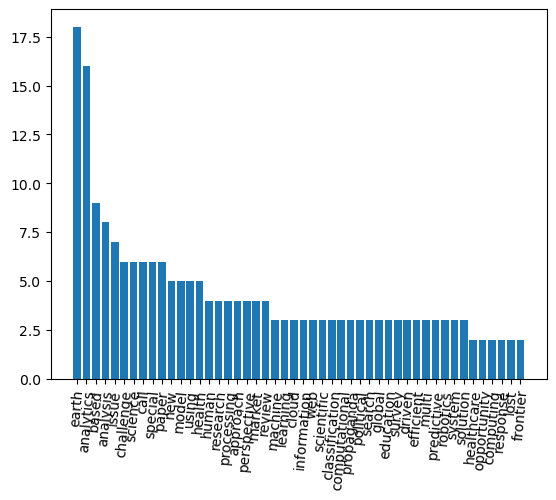

In [35]:
import matplotlib.pyplot as plt

sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(), reverse=True)
# sorted_Values
plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation='85')  # rotation: 회전시켜주는 속성
plt.show()

In [29]:
word_count.get   # key값을 알려주는 객체

<function dict.get(key, default=None, /)>

In [34]:
del word_count['big']   # 키값이 'big'인것 삭제
del word_count['data']

In [36]:
word_count

{'earth': 18,
 'analytics': 16,
 'based': 9,
 'analysis': 8,
 'issue': 7,
 'challenge': 6,
 'science': 6,
 'call': 6,
 'special': 6,
 'paper': 6,
 'new': 5,
 'model': 5,
 'using': 5,
 'health': 5,
 'human': 4,
 'research': 4,
 'processing': 4,
 'approach': 4,
 'perspective': 4,
 'market': 4,
 'review': 4,
 'machine': 3,
 'learning': 3,
 'cloud': 3,
 'information': 3,
 'web': 3,
 'scientific': 3,
 'classification': 3,
 'computational': 3,
 'propaganda': 3,
 'political': 3,
 'search': 3,
 'global': 3,
 'education': 3,
 'survey': 3,
 'driven': 3,
 'efficient': 3,
 'multi': 3,
 'predictive': 3,
 'robotics': 3,
 'system': 3,
 'solution': 3,
 'healthcare': 2,
 'opportunity': 2,
 'computing': 2,
 'response': 2,
 'lost': 2,
 'frontier': 2}

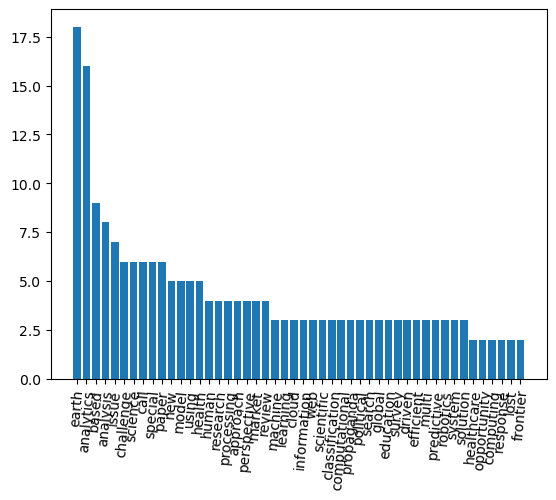

In [37]:
sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(), reverse=True)
# sorted_Values
plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation='85')  # rotation: 회전시켜주는 속성
plt.show()

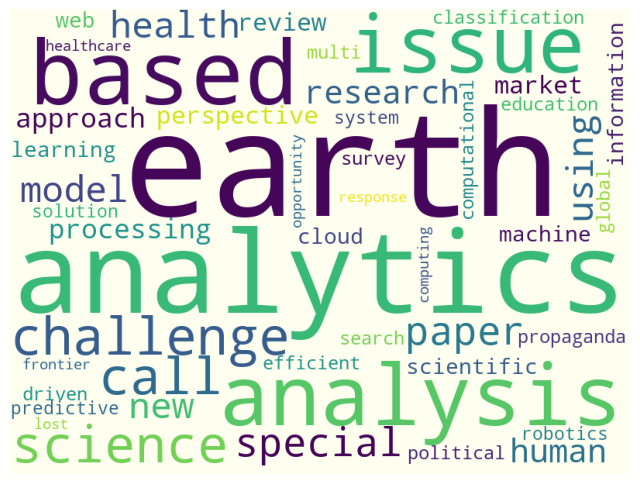

In [45]:
# 워드 클라우드 그리기
from wordcloud import STOPWORDS,WordCloud
stopwords = set(STOPWORDS)
wc = WordCloud(background_color='ivory', stopwords=stopwords, width=800, height=600)
cloud = wc.generate_from_frequencies(word_count)
# cloud

plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')  # 축을 없애줌
plt.show()

cloud.to_file('eng_wordCloud.jpg')